<a href="https://colab.research.google.com/github/B612Spac/E-Commerce-Case-Study-Analysis/blob/main/E_Commerce_Case_Study_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Sales Performance & Customer Behavior Analysis
---------------------------------------------------------------

## Business Context
A mid-sized UK-based online retail company has experienced rapid growth in online transactions but lacks data-driven insight into customer behavior, product performance, and revenue drivers. Management relies largely on intuition rather than analytics to guide marketing, inventory, and expansion decisions.

## Problem Statement
Despite having transactional data, the organization struggles to answer key business questions such as which products drive revenue, which customers are most valuable, and how purchasing behavior varies across countries and time. This limits effective decision-making.

## Project Objective
The objective of this project is to analyze historical e-commerce transaction data to uncover actionable insights related to sales performance, customer purchasing patterns, product demand, and operational efficiency.

## Stakeholders
- Business Management
- Marketing Team
- Operations & Inventory Team
- Data & Analytics Team

## Key Business Goals
- Identify top-performing products and revenue drivers
- Understand customer purchasing behavior and repeat patterns
- Analyze sales distribution across countries
- Detect returns and anomalies impacting revenue
- Provide data-backed recommendations for growth


The insights from this analysis will support more informed decision-making across marketing, inventory planning, and international expansion.

### Data Overview

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
df = pd.read_csv('/content/Ecommerce_Data-1.csv')
df

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,439570,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12
1,387281,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10
2,337863,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9
3,57628,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13
4,330897,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10
...,...,...,...,...,...,...,...,...,...,...
81596,271411,560692,21294,ETCHED GLASS COASTER,4,0.39,14704.0,United Kingdom,2011-07-20,12
81597,44667,540187,22569,FELTCRAFT CUSHION BUTTERFLY,4,3.75,15358.0,United Kingdom,2011-01-05,13
81598,134884,547871,17012C,ORIGAMI LAVENDER INCENSE/CANDL SET,5,2.55,16931.0,United Kingdom,2011-03-27,14
81599,288051,562129,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,13186.0,United Kingdom,2011-08-03,9


In [ ]:
df.shape

(81601, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81601 entries, 0 to 81600
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   81601 non-null  int64  
 1   InvoiceNo    81601 non-null  object 
 2   StockCode    81601 non-null  object 
 3   Description  81601 non-null  object 
 4   Quantity     81601 non-null  int64  
 5   UnitPrice    81601 non-null  float64
 6   CustomerID   81601 non-null  float64
 7   Country      81601 non-null  object 
 8   Date         81601 non-null  object 
 9   Hour         81601 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 6.2+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
UnitPrice,0
CustomerID,0
Country,0
Date,0
Hour,0


The dataset contains 81,601 transaction records across 10 columns, consisting of numerical and categorical variables, including product descriptions, customer id and loaction, pricing, and time of purchase. The data types include integers, floating-point values, and object (categorical) variables.

An initial data quality check showed no missing values across the dataset, indicating a complete transactional record. This allowed the analysis to proceed without the need for imputation, while still requiring further validation for outliers, returns, and pricing anomalies.

### Data Quality Assessment and Preprocessing

In [ ]:
#Check duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking datatypes
df.dtypes

,0
Unnamed: 0,int64
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
UnitPrice,float64
CustomerID,float64
Country,object
Date,object
Hour,int64


In [ ]:
#convert necessary datatypes
df['CustomerID'] = df['CustomerID'].astype('int')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#drop redundant column
df.drop(columns=['Unnamed: 0'], inplace=True)

During data quality assessment, several columns required data type validation. The Date column was converted from object to datetime format to enable time-based analysis. Additionally, CustomerID was converted from float to integer to better reflect its role as a unique identifier. Non-informative columns such as index fields were removed to improve data clarity.

## Return Analysis and Revenue Impact
------------------------------------------
From a business perspective, return analysis is a key performance indicator(KPI) that supports decisions related to product quality control, pricing strategies, inventory management, and profitability optimization.

While the transaction-level return rate provides insight into how frequently returns occur, it does not FULLY capture their operational or financial impact. To better understand the effect of returns, additional metrics were calculated based on product quantity and revenue.




In [ ]:
#check negative values in quantity to see returned products
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
22,C569959,22197,POPCORN HOLDER,-3,0.85,13983,United Kingdom,2011-10-06,18
62,C538701,22644,CERAMIC CHERRY CAKE MONEY BANK,-1,1.45,16863,United Kingdom,2010-12-14,10
72,C543706,22423,REGENCY CAKESTAND 3 TIER,-1,12.75,15044,United Kingdom,2011-02-11,11
129,C559309,22727,ALARM CLOCK BAKELIKE RED,-4,3.75,17719,United Kingdom,2011-07-07,13
281,C542091,22442,GROW YOUR OWN FLOWERS SET OF 3,-1,7.95,17091,United Kingdom,2011-01-25,12
...,...,...,...,...,...,...,...,...,...
81363,C547763,23182,TOILET SIGN OCCUPIED OR VACANT,-1,0.83,14194,United Kingdom,2011-03-25,11
81397,C540788,21231,SWEETHEART CERAMIC TRINKET BOX,-2,1.25,13576,United Kingdom,2011-01-11,11
81446,C562559,21231,SWEETHEART CERAMIC TRINKET BOX,-13,1.25,16743,United Kingdom,2011-08-05,17
81567,C560540,23242,TREASURE TIN BUFFALO BILL,-1,2.08,12415,Australia,2011-07-19,12


In [ ]:
#calculate products returns rate
count_return_rate = (df[df['Quantity'] < 0].shape[0] / len(df)) * 100
count_return_rate

2.1850222423744805

In [ ]:
#calculate return rate based on quantity
quantity_return_rate = abs(df[df['Quantity'] < 0]['Quantity'].sum()) / df[df['Quantity'] > 0]['Quantity'].sum() * 100
quantity_return_rate

np.float64(2.612095491245306)

In [ ]:
#calculate revenue impact of returns
returns_revenue = (df[df['Quantity'] < 0]['Quantity'] * df[df['Quantity'] < 0]['UnitPrice']).sum()
total_revenue = (df[df['Quantity'] > 0]['Quantity'] * df[df['Quantity'] > 0]['UnitPrice']).sum()

revenue_impact = (abs(returns_revenue) / total_revenue) * 100
revenue_impact

np.float64(3.892914962464552)

The analysis shows that although return transactions represent a relatively small proportion of TOTAL TRANSACTIONS, their impact **varies significantly** when evaluated by QUANTITY and REVENUE.

Low-frequency returns involving HIGH-PRICED PRODUCTS can result in substantial REVENUE LOSS, while HIGH-VOLUME RETURNS of moderately priced items CAN ERODE REVENUE through scale.

These patterns highlight the importance of monitoring returns beyond transaction counts, as they directly affect net revenue, inventory planning, and operational efficiency.


### Business Recommendations Based on Return Analysis

Based on the return analysis and its observed impact on revenue, the following recommendations are proposed:

- **Strengthen Product Quality Control:**  
  Products with higher return frequency or revenue impact should be reviewed for potential quality issues such as damage, incorrect packaging, or mismatch between product description and actual delivery.

- **Review Pricing and Value Perception:**  
  High-value items with notable return rates should be evaluated to determine whether pricing aligns with customer expectations and perceived value.

- **Improve Inventory and Stock Management:**  
  Returned items may indicate issues related to expired stock, overstocking, or prolonged storage. Optimizing inventory turnover can help reduce return-related losses and improve stock efficiency.

- **Monitor Return Impact on Profitability:**  
  Even when return transactions are relatively low, returns involving high-priced or high-volume items can significantly affect net revenue. Continuous monitoring of return-related KPIs is essential to protect profitability.

- **Use Return Metrics as Operational KPIs:**  
  Transaction-level, quantity-based, and revenue-based return metrics should be tracked regularly to support informed decisions across operations, pricing, and supply chain management.


In [ ]:
#Identify zero prices
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
4154,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,0.0,13081,United Kingdom,2011-11-10,11
11072,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,0.0,16133,United Kingdom,2011-09-25,12
13360,562973,23157,SET OF 6 NATIVITY MAGNETS,240,0.0,14911,EIRE,2011-08-11,11
27335,561284,22167,OVAL WALL MIRROR DIAMANTE,1,0.0,16818,United Kingdom,2011-07-26,12
27666,571035,M,Manual,1,0.0,12446,RSA,2011-10-13,12
29404,569716,22778,GLASS CLOCHE SMALL,2,0.0,15804,United Kingdom,2011-10-06,8
39937,564651,22955,36 FOIL STAR CAKE CASES,144,0.0,14646,Netherlands,2011-08-26,14
40441,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,16560,United Kingdom,2010-12-16,14
47193,572893,21208,PASTEL COLOUR HONEYCOMB FAN,5,0.0,18059,United Kingdom,2011-10-26,14
48665,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,0.0,12444,Norway,2011-11-18,13


Transactions with a unit price of zero were identified in the dataset. These records were excluded from revenue-based calculations, as they likely represent data entry errors, promotional giveaways, or non-revenue transactions. Including such records would distort revenue and profitability analysis.

### Feature Engineering and Exploratory Data Analysis(EDA)

To ANALYZE THE KEY DRIVERS OF REVENUE AND DEMAND, returned transactions were removed from the main dataset and stored in a separate dataframe. The remaining dataset (sales_df) therefore represents completed sales only, ensuring that revenue, pricing, and demand analyses are not distorted by returned items.

It is IMPORTANT TO NOTE that sales_df still contains products with a unit price of zero. These records were intentionally retained for volume-based analysis. Zero-priced items may represent promotional giveaways, bundled products, or potential data entry errors. Including them allows the business to assess whether a significant volume of products is being distributed without direct revenue impact, which could influence promotional effectiveness, inventory planning, and profit margins.


In [ ]:
#Seperate complete transaction from the main dataset
sales_df = df[df['Quantity'] > 0]
sales_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453,United Kingdom,2011-11-04,12
1,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098,United Kingdom,2011-10-10,10
2,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609,United Kingdom,2011-09-13,9
3,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329,United Kingdom,2011-01-14,13
4,565930,POST,POSTAGE,5,18.00,12685,France,2011-09-08,10
...,...,...,...,...,...,...,...,...,...
81596,560692,21294,ETCHED GLASS COASTER,4,0.39,14704,United Kingdom,2011-07-20,12
81597,540187,22569,FELTCRAFT CUSHION BUTTERFLY,4,3.75,15358,United Kingdom,2011-01-05,13
81598,547871,17012C,ORIGAMI LAVENDER INCENSE/CANDL SET,5,2.55,16931,United Kingdom,2011-03-27,14
81599,562129,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,13186,United Kingdom,2011-08-03,9


In [ ]:
#Create revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']
sales_df.loc[:, 'Revenue'] = sales_df['Quantity'] * sales_df['UnitPrice']
sales_df['Revenue'].unique()

array([  3.25,  89.4 ,  45.  , ..., 733.44, 750.  , 594.  ])

In [ ]:
#Extract months from date column and join to sales_df
df['Month'] = df['Date'].dt.month
sales_df.loc[:, 'Month'] = sales_df['Date'].dt.month
sales_df['Month'].unique()

array([11, 10,  9,  1,  6,  2,  5,  3, 12,  4,  8,  7], dtype=int32)

In [ ]:
#0 What is the total revenue
total_sales_revenue = sales_df['Revenue'].sum()
print(f"Total Sales Revenue: £{total_sales_revenue:.2f}")

Total Sales Revenue: £1709696.22


In [ ]:
# Calculate revenue per product
product_revenue = sales_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Display the top 10 products by revenue
print("Top 10 Products by Revenue:")
display(product_revenue.head(10))

Top 10 Products by Revenue:


,Revenue
Description,
REGENCY CAKESTAND 3 TIER,25376.94
WHITE HANGING HEART T-LIGHT HOLDER,17665.19
PARTY BUNTING,16403.16
FAIRY CAKE FLANNEL ASSORTED COLOUR,13912.39
POSTAGE,13189.39
JUMBO BAG RED RETROSPOT,12931.18
ASSORTED COLOUR BIRD ORNAMENT,11416.52
CHILLI LIGHTS,8285.00
SET OF 3 CAKE TINS PANTRY DESIGN,8189.70


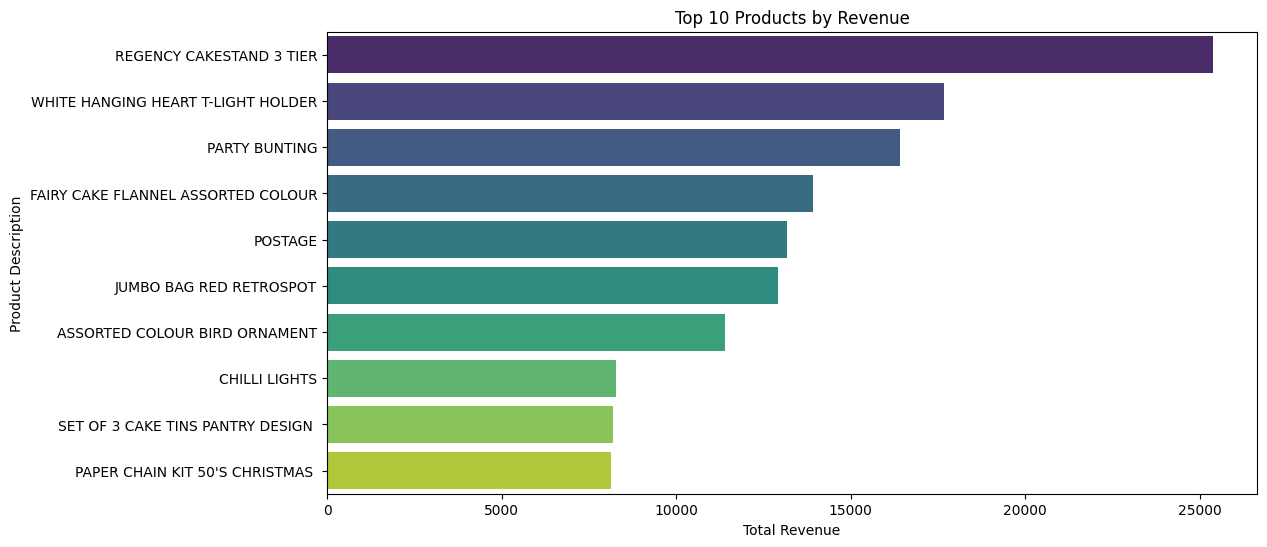

In [ ]:
# Visualize the top 10 products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=product_revenue.head(10).values, y=product_revenue.head(10).index, hue=product_revenue.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()

The chart highlights the top ten products contributing the highest revenue within the analysis period. The *Regency Cakestand 3 Tier* stands out as the highest revenue-generating product by a significant margin, indicating strong and consistent customer demand. This suggests that certain premium or well-positioned products can disproportionately drive overall revenue.

Several decorative and gift-oriented items, such as *White Hanging Heart T-Light Holder* and *Party Bunting*, also feature prominently among the top sellers. This pattern indicates a customer preference for home décor and seasonal or celebratory products, which may experience recurring demand throughout the year.

Additionally, the presence of items like *Postage* among the top revenue contributors suggests that ancillary charges play a non-trivial role in total revenue and should be considered when evaluating overall sales performance.

These insights can support inventory prioritization, targeted promotions, and bundling strategies. Ensuring consistent stock availability for top-performing products while exploring cross-selling opportunities with lower-performing items may help maximize revenue and improve


In [ ]:
#2 Understand customer purchasing behavior and repeat patterns
purchase_frequency = (
    sales_df
    .groupby('CustomerID')['InvoiceNo']
    .nunique()
    .reset_index(name='purchase_count'))

top_30_customers = (
    purchase_frequency
    .sort_values(by='purchase_count', ascending=False)
    .head(30))
top_30_customers

,CustomerID,purchase_count
1779,14911,183
319,12748,157
3797,17841,113
1569,14606,89
2065,15311,86
532,13089,77
1596,14646,57
1513,14527,53
1260,14156,48
1862,15039,43


To understand customer purchase frequency, the number of unique purchase transactions per customer was calculated. This helps identify whether customers are predominantly one-time buyers or repeat purchasers, providing insight into customer retention and engagement.


In [ ]:
#Understand customer purchasing behavior and repeat patterns
purchase_frequency['customer_type'] = purchase_frequency['purchase_count'].apply(
    lambda x: 'Repeat Customer' if x > 1 else 'One-time Customer'
)

purchase_frequency['customer_type'].value_counts(normalize=True) * 100

,proportion
customer_type,
Repeat Customer,62.335125
One-time Customer,37.664875


In [ ]:
#Merge purchase frequency to the sales_df so revenue type can be calculated
sales_df = sales_df.merge(
    purchase_frequency[['CustomerID', 'customer_type']],
    on='CustomerID',
    how='left')

In [ ]:
#Revenue by customer type
revenue_by_type = (
    sales_df
    .groupby('customer_type')['Revenue']
    .sum()
    .reset_index()
)
revenue_by_type

,customer_type,Revenue
0,One-time Customer,131497.420
1,Repeat Customer,1578198.801


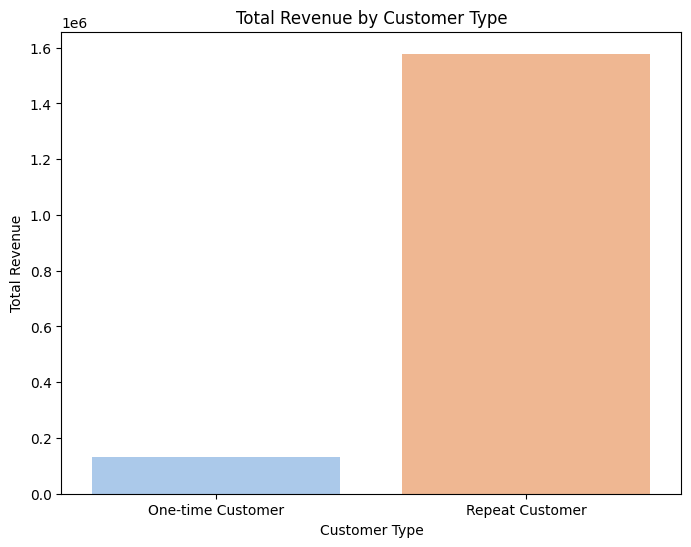

In [ ]:
#Visualize it
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_type', y='Revenue', data=revenue_by_type, palette='pastel', hue='customer_type', legend=False)
plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.show()

The analysis shows a clear distinction in revenue contribution between one-time and repeat customers.

Repeat customers account for the majority of total revenue, generating approximately £1.58M, while one-time customers contribute about £131.5K. This indicates that although one-time customers exist in significant numbers, their overall impact on revenue is relatively small compared to customers who make repeat purchases.

I suggest that strategies focused on improving customer experience, loyalty programs, and personalized marketing could yield substantial financial benefits.


In [ ]:
#Checking revenue by country
country_revenue = (
    sales_df
    .groupby('Country')['Revenue']
    .sum()
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
)
country_revenue.head(10)

,Country,Revenue
35,United Kingdom,1404298.021
10,EIRE,53134.530
23,Netherlands,52680.640
14,Germany,44284.800
13,France,39419.040
0,Australia,24775.310
30,Spain,10949.780
32,Switzerland,10515.160
31,Sweden,9590.390
3,Belgium,7541.880


In [ ]:
#Grouping customers by country
country_customers = (
    sales_df
    .groupby('Country')['CustomerID']
    .nunique()
    .reset_index(name='customer_count')
    .sort_values(by='customer_count', ascending=False)
)
country_customers.head(10)


,Country,customer_count
35,United Kingdom,3690
14,Germany,92
13,France,85
30,Spain,30
3,Belgium,24
32,Switzerland,21
26,Portugal,18
18,Italy,14
12,Finland,12
1,Austria,11


In [ ]:
#Country by revenue and customer count
country_summary = country_revenue.merge(
    country_customers,
    on='Country',
    how='inner'
)

country_summary.head(10)


,Country,Revenue,customer_count
0,United Kingdom,1404298.021,3690
1,EIRE,53134.530,3
2,Netherlands,52680.640,7
3,Germany,44284.800,92
4,France,39419.040,85
5,Australia,24775.310,9
6,Spain,10949.780,30
7,Switzerland,10515.160,21
8,Sweden,9590.390,7
9,Belgium,7541.880,24


The country-level analysis reveals a strong concentration of revenue and customers in the United Kingdom, which accounts for the majority of total revenue and customer volume. This indicates that the UK represents the company’s core and most mature market.

In contrast, several countries such as EIRE, the Netherlands, and Australia generate relatively high revenue despite having a very small number of customers. This suggests the presence of high-value customers or larger average order sizes in these regions. Meanwhile, countries like Germany and France show moderate revenue levels supported by a broader customer base, indicating potential growth opportunities through customer expansion strategies.

From a strategic standpoint, these insights suggest that while the UK should remain a primary focus for retention and optimization, targeted marketing and expansion efforts in high-value but low-customer-count markets could drive additional revenue growth.


In [ ]:
#Revenue per hour
hourly_sales = (
    sales_df
    .groupby('Hour')['Revenue']
    .sum()
    .reset_index()
)


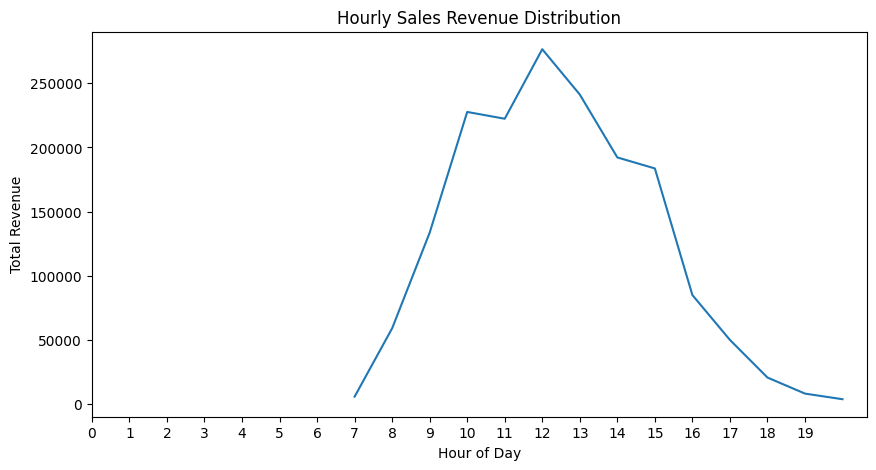

In [ ]:
#Visualize it
plt.figure(figsize=(10, 5))
plt.plot(hourly_sales['Hour'], hourly_sales['Revenue'])
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.title('Hourly Sales Revenue Distribution')
plt.xticks(range(0, 20))
plt.show()


The hourly sales analysis shows a clear concentration of revenue during late morning and early afternoon hours, with sales peaking around midday. Revenue begins to rise sharply from the early morning, reaches its highest point around 12:00–13:00, and then gradually declines toward the evening.

This pattern suggests that customer purchasing activity is strongest during standard business hours, likely reflecting workplace purchasing behavior or daytime browsing habits.

This insight can inform the optimal timing for promotions, email campaigns, and system resource allocation to maximize engagement during peak revenue periods.


In [ ]:
#Revenue per month
monthly_sales = (
    sales_df
    .groupby('Month')['Revenue']
    .sum()
    .reset_index()
)

monthly_sales['Month'] = monthly_sales['Month'].astype(str)


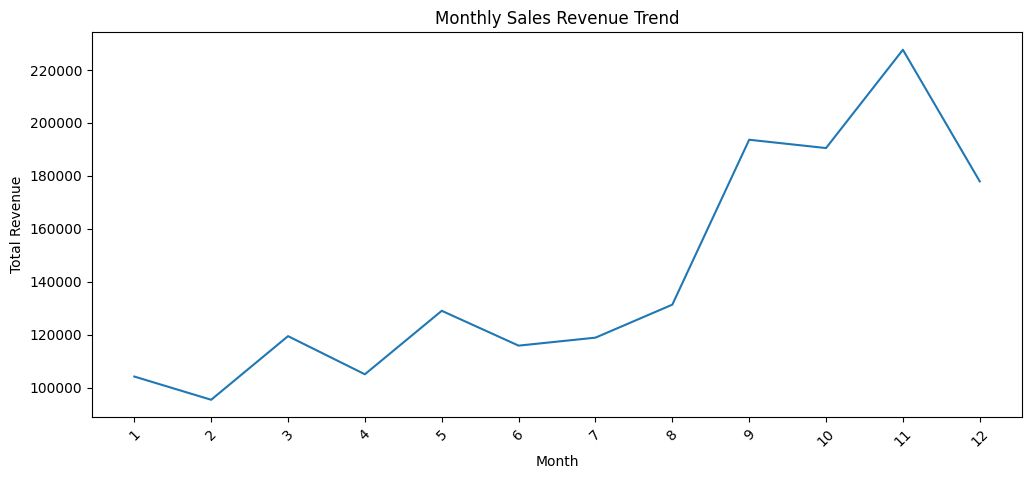

In [ ]:
#Vizualize it
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Revenue'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Revenue Trend')
plt.xticks(rotation=45)
plt.show()


The monthly sales trend indicates noticeable seasonality in revenue performance. Sales remain relatively stable during the early and mid-year months but begin to rise significantly toward the final quarter, with the highest revenue observed around November.

This trend suggests strong seasonal demand, likely driven by holiday-related purchases and end-of-year gifting behavior. The slight decline in December may reflect order cut-off dates or incomplete monthly data.

These insights can support proactive inventory planning, staffing decisions, and targeted marketing campaigns ahead of peak sales periods.


### Outlier detection and analysis

In [ ]:
#Summary statistic of UnitPrice
df['UnitPrice'].describe()

,UnitPrice
count,81601.000000
mean,3.168721
std,18.731668
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,4287.630000


In [ ]:
#IQR Calculation
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#Finding outliers using IQR
upper_bound = Q3 + 1.5 * IQR
df[df['UnitPrice'] > upper_bound]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,Revenue,Month
4,565930,POST,POSTAGE,5,18.00,12685,France,2011-09-08,10,90.00,9
17,548311,48188,DOORMAT WELCOME PUPPIES,2,7.95,13728,United Kingdom,2011-03-30,12,15.90,3
23,571123,23008,DOLLY GIRL BABY GIFT SET,6,14.95,14856,United Kingdom,2011-10-14,9,89.70,10
26,576860,48138,DOORMAT UNION FLAG,1,8.25,17602,United Kingdom,2011-11-16,15,8.25,11
34,571225,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,7.95,14397,United Kingdom,2011-10-14,13,15.90,10
...,...,...,...,...,...,...,...,...,...,...,...
81573,562085,48187,DOORMAT NEW ENGLAND,2,7.95,15228,United Kingdom,2011-08-02,12,15.90,8
81575,C540860,35400,WOODEN BOX ADVENT CALENDAR,-1,8.95,15953,United Kingdom,2011-01-12,11,-8.95,1
81578,537781,85135B,BLUE DRAGONFLY HELICOPTER,1,7.95,17341,United Kingdom,2010-12-08,12,7.95,12
81590,543631,21955,DOORMAT UNION JACK GUNS AND ROSES,1,7.95,14081,United Kingdom,2011-02-10,16,7.95,2


In [ ]:
#Outlier impact on revenue
high_price_revenue = df[df['UnitPrice'] > upper_bound]['Revenue'].sum()
total_revenue = df['Revenue'].sum()

high_price_revenue / total_revenue * 100


np.float64(12.624815954348351)

Outlier detection was performed on the `UnitPrice` variable using the Interquartile Range (IQR) method. The distribution of unit prices is highly right-skewed, with the majority of products priced below 4.00, while a small number of items exhibit significantly higher prices.

Values exceeding the upper IQR threshold were flagged as potential outliers. These observations likely represent premium or bulk-priced products rather than data errors. As such, they were retained for analysis, but their presence was noted due to their potential to disproportionately influence aggregate revenue metrics. As calculated, 12.62% of revenue comes from these high-priced items.


# Closing Recommendations

---



👉 **Short-Term (Operational)**

1. Monitor high-volume products with elevated return rates to identify potential issues related to:

- Product quality

- Customer expectations

- Delivery or packaging problems

2. Implement product-level return rate tracking rather than focusing only on total return volume.


👉 **Medium-Term (Analytical)**

1. Segment return analysis by:

- Product category

- Customer type

- Purchase frequency

This would help identify whether returns are concentrated among specific customer behaviors or product groups.

2. Introduce a return rate threshold (e.g., 5–7%) to flag products that may require review.


👉 **Long-Term (Strategic)**

1. Combine return analysis with customer lifetime value (CLV) or repeat purchase behavior to understand whether returns are driven by loyal customers or one-time buyers.

2. Leverage findings to inform:

- Product improvement decisions

- Inventory planning

- Promotional strategies